###  LN MARKET

In [105]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib.markers

In [106]:
# filepath = 'C:\\Users\\1098071\\Documents\\RF\\'

In [107]:
d = pd.read_csv('MKTCAP_LN.csv', encoding = 'cp932')
d.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,AAL,0.0000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,...,4722.000,-4027.000,11819.000,12514.000,0.189228,inf,inf,0.114236,0.401220,0.0000
1,2000,ABF,3385.8000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,...,1022.000,-735.000,1459.000,1746.000,0.187285,0.096580,0.265137,0.111833,0.092430,3385.8000
2,2000,ACL,121.9050,245.360,13.484,8.232,146.453,8.461,0.000,86.766,...,78.305,-54.935,9.342,32.712,0.412203,0.110611,0.481594,0.390139,0.092395,121.9050
3,2000,ADB,0.0000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,...,6.352,-5.785,16.087,16.654,0.146992,inf,inf,0.185581,0.528041,0.0000
4,2000,ADN,846.9825,115.721,34.225,24.126,274.148,45.815,3.054,91.628,...,42.759,-81.432,11.307,-27.366,-1.250639,0.040408,-1.085167,0.306294,0.041408,846.9825


### Data prep

In [108]:
# drop all rows with zero MKTCAP and all columns with zero only values 
cols = d.columns[(d == 0).all()]
print (cols)
df = d.drop(cols, axis = 1)
# remove NAN too
df2 = df[df['MKTCAP'] != 0].dropna()

Index(['敷金及び保証金', '賞与引当金', '決算発表日', '剰余金の配当', '自己株式の消却', '新株の発行', '土地1',
       '経常利益', '長期社債(当期返済分)'],
      dtype='object')


In [109]:
# checking the years with the most data available 
df2.groupby('ddate').count()

,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
ddate,,,,,,,,,,,,,,,,,,,,,
2000,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
2001,342,342,342,342,342,342,342,342,342,342,...,342,342,342,342,342,342,342,342,342,342
2002,355,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355
2003,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348
2004,396,396,396,396,396,396,396,396,396,396,...,396,396,396,396,396,396,396,396,396,396
2005,455,455,455,455,455,455,455,455,455,455,...,455,455,455,455,455,455,455,455,455,455
2006,484,484,484,484,484,484,484,484,484,484,...,484,484,484,484,484,484,484,484,484,484
2007,602,602,602,602,602,602,602,602,602,602,...,602,602,602,602,602,602,602,602,602,602
2008,606,606,606,606,606,606,606,606,606,606,...,606,606,606,606,606,606,606,606,606,606


In [110]:
# prepare MKTCAP from 2016 as y

df2016 = df2[df2['ddate'] ==2016][['security_code', 'MKTCAP']]
print (df2016.shape[0])
df2016.head()

833


,security_code,MKTCAP
15119,AA/,1515.645600
15121,AAL,15690.662460
15124,AAZ,20.842300
15125,ABC,1598.167339
15126,ABDP,83.138200


In [111]:
# feature xs are data from 2015
# feature columns
collist = list(df2.columns[1:61])
df2015 = df2[df2['ddate'] == 2015][collist]

# delete the '時価総額' column
del df2015['時価総額']
print (df2015.shape[0])
df2015.head()

793


,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
13759,AAL,20455.0000,-4261.0000,-5624.000,52013.0000,6895.0000,0.0,13797.000,846.0,29621.0000,...,21342.0000,-3237.0000,-0.050061,-0.208311,0.0,-10226.0000,6902.0000,-4207.000,29621.0000,32316.0000
13762,AAZ,78.0570,-2.9400,-7.381,172.0410,0.2490,0.0,42.577,0.0,112.2880,...,78.6440,-5.7630,0.036166,-0.037665,0.0,-49.0470,42.3280,-20.112,112.2880,134.5040
13763,ABC,144.0330,46.3700,37.384,249.9460,57.0590,0.0,100.522,0.0,12.4510,...,214.1040,-55.1560,0.704880,0.321940,0.0,57.0590,43.4630,-21.058,12.4510,34.8560
13764,ABDP,16.5226,3.7743,3.246,16.9099,7.9678,0.0,15.134,0.0,1.7273,...,13.6499,-1.5757,0.323799,0.228433,0.0,7.9678,7.1662,-3.260,1.7273,5.6335
13765,ABF,12800.0000,890.0000,528.000,10219.0000,702.0000,0.0,3849.000,0.0,4518.0000,...,6511.0000,-2129.0000,0.235859,0.069531,0.0,-194.0000,3147.0000,-2423.000,4518.0000,5242.0000


In [112]:
# only keeping companies that exist in both 2015 and 2016 
# removing entries with zero MKTCAP
# will only work on data2 later 

data = pd.merge(df2015, df2016, how='inner', on=['security_code']).dropna()
data2 = data[data['MKTCAP'] != 0]

# data2.describe()
print (data2.shape[0])
data2.head()

726


,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
0,AAL,20455.0000,-4261.0000,-5624.000,52013.0000,6895.0000,0.0,13797.000,846.0,29621.0000,...,-3237.0000,-0.050061,-0.208311,0.0,-10226.0000,6902.0000,-4207.000,29621.0000,32316.0000,15690.662460
1,AAZ,78.0570,-2.9400,-7.381,172.0410,0.2490,0.0,42.577,0.0,112.2880,...,-5.7630,0.036166,-0.037665,0.0,-49.0470,42.3280,-20.112,112.2880,134.5040,20.842300
2,ABC,144.0330,46.3700,37.384,249.9460,57.0590,0.0,100.522,0.0,12.4510,...,-55.1560,0.704880,0.321940,0.0,57.0590,43.4630,-21.058,12.4510,34.8560,1598.167339
3,ABDP,16.5226,3.7743,3.246,16.9099,7.9678,0.0,15.134,0.0,1.7273,...,-1.5757,0.323799,0.228433,0.0,7.9678,7.1662,-3.260,1.7273,5.6335,83.138200
4,ABF,12800.0000,890.0000,528.000,10219.0000,702.0000,0.0,3849.000,0.0,4518.0000,...,-2129.0000,0.235859,0.069531,0.0,-194.0000,3147.0000,-2423.000,4518.0000,5242.0000,20844.781200


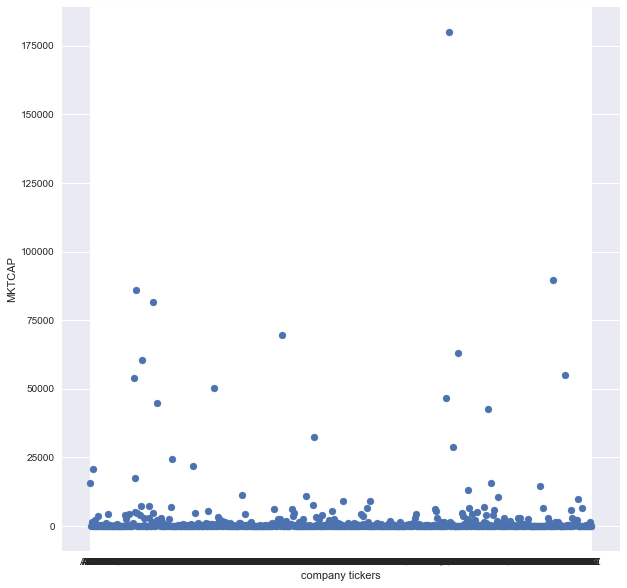

In [113]:
# scatter plot all available data; MKTCAP from 2014 and featueres from 2013 

fig = plt.figure(figsize = (10,10))

num =  len(data2['security_code']) 
x = np.arange(num)
y = data2['MKTCAP']
my_xticks = list(data2['security_code'].values)
plt.xticks(x, my_xticks)
plt.scatter(x, y)
plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

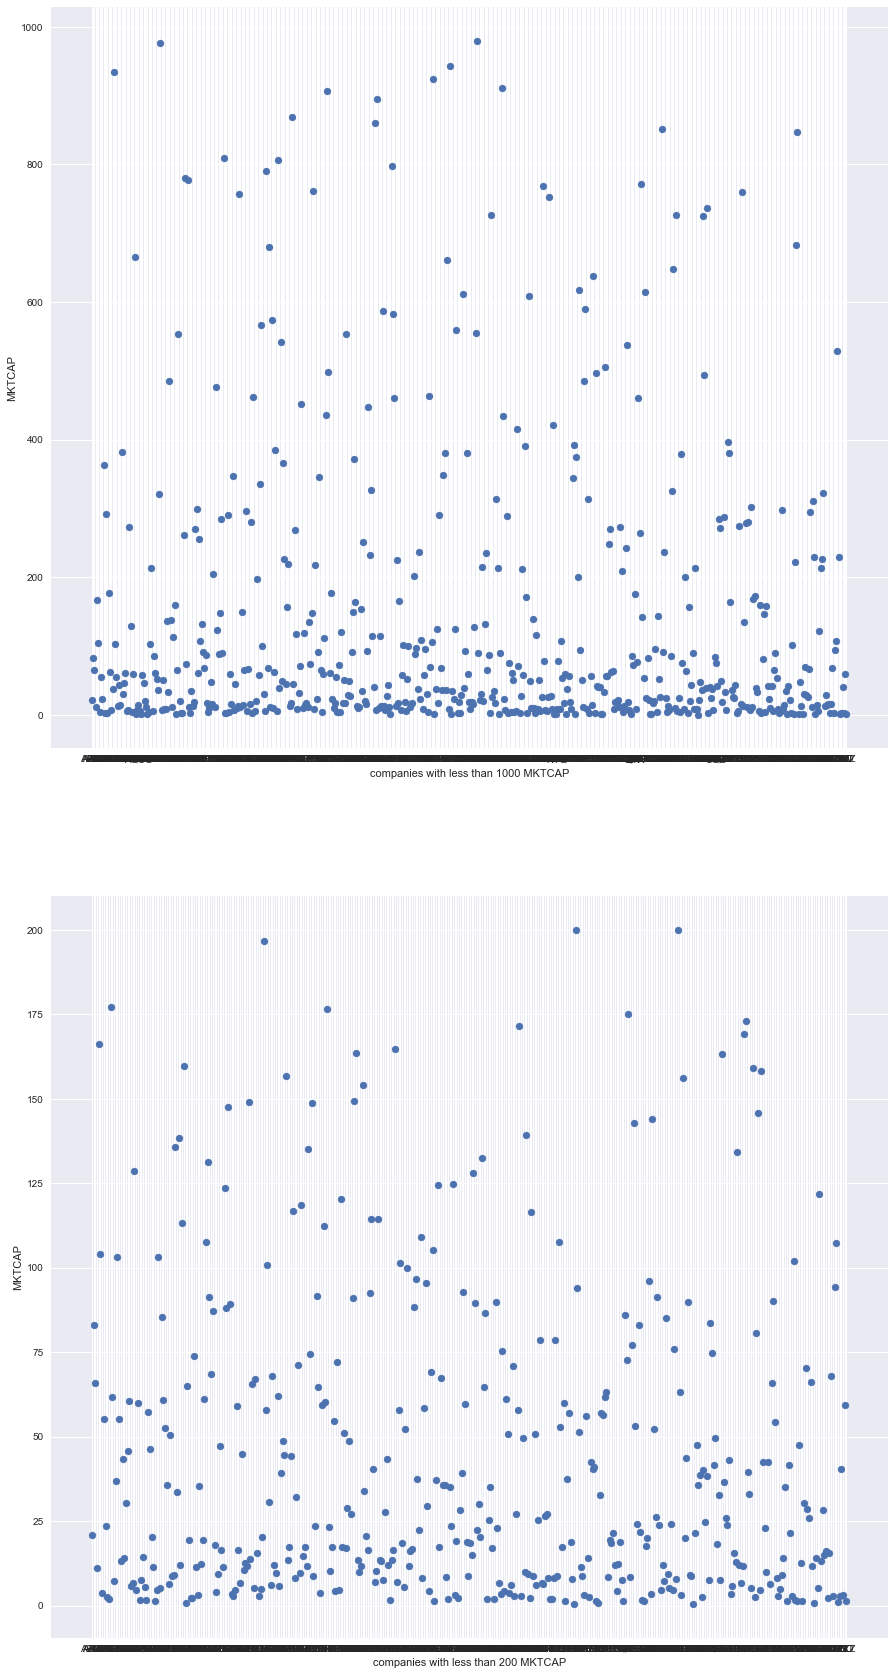

In [114]:
# zoom in
# plot of companies with less than 1000 MKTCAP

plot = data2[data2['MKTCAP'] < 1000]

# companies with less than 200 MKTCAP  
plot2 = data2[data2['MKTCAP'] < 200]


fig = plt.figure(figsize = (15, 30))
ax = plt.subplot(2, 1, 1)

num = plot.shape[0]
x = np.arange(num)
my_xticks = list(plot['security_code'].values)
plt.xticks(x, my_xticks)
y = plot['MKTCAP']

plt.xlabel('companies with less than 1000 MKTCAP')
plt.ylabel('MKTCAP')
plt.scatter(x, y)


# further zoom in
ax = plt.subplot(2, 1, 2)

num2 = plot2.shape[0]
x2 = np.arange(num2)
my_xticks2 = list(plot2['security_code'].values)
plt.xticks(x2, my_xticks2)
y2 = plot2['MKTCAP']

plt.xlabel('companies with less than 200 MKTCAP')
plt.ylabel('MKTCAP')
plt.scatter(x2, y2)


plt.show()

In [115]:
# np.array_str(df2['security_code'].values)

### Training RF

In [116]:
# use 2015 data to predict 2016 MKTCAP

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [117]:
# features from data in 2013
featurelist = data2.columns[1:59]
print (len(featurelist))
data2[featurelist].head()

58


,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
0,20455.0000,-4261.0000,-5624.000,52013.0000,6895.0000,0.0,13797.000,846.0,29621.0000,1649.000,...,21342.0000,-3237.0000,-0.050061,-0.208311,0.0,-10226.0000,6902.0000,-4207.000,29621.0000,32316.0000
1,78.0570,-2.9400,-7.381,172.0410,0.2490,0.0,42.577,0.0,112.2880,26.708,...,78.6440,-5.7630,0.036166,-0.037665,0.0,-49.0470,42.3280,-20.112,112.2880,134.5040
2,144.0330,46.3700,37.384,249.9460,57.0590,0.0,100.522,0.0,12.4510,0.000,...,214.1040,-55.1560,0.704880,0.321940,0.0,57.0590,43.4630,-21.058,12.4510,34.8560
3,16.5226,3.7743,3.246,16.9099,7.9678,0.0,15.134,0.0,1.7273,0.000,...,13.6499,-1.5757,0.323799,0.228433,0.0,7.9678,7.1662,-3.260,1.7273,5.6335
4,12800.0000,890.0000,528.000,10219.0000,702.0000,0.0,3849.000,0.0,4518.0000,319.000,...,6511.0000,-2129.0000,0.235859,0.069531,0.0,-194.0000,3147.0000,-2423.000,4518.0000,5242.0000


In [118]:
# remove the float('-inf') values, which come from EXCEL
# replace them with nan first, then drop
data2 = data2.replace([float('-inf'), float('inf')], np.nan).dropna()

# double check
sum(data2.values == float('-inf'))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
# training testing data split 4:1, set random_state to keep datapoints the same in each run 

x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0)

x_train.shape

(580, 58)

In [120]:
# x_test.head(3)

In [121]:
# initial regression model with default values  
regr = RandomForestRegressor(random_state=0, bootstrap=True, oob_score = True)
regr.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [122]:
# coefficient of determination R^2 of the regression on tesing data 
regr.score(x_test, y_test)

0.73145770938245569

In [123]:
# error estimation using OOB estimation on training data 
# according to some resesrch, this OOB estiamtion of error is accurate as long as enough trees are grown 
print (regr.oob_score_)

# print (regr.oob_prediction_)

0.506060325972


In [124]:
# feature importance exploration  
# number of features in the model is 58

importances = regr.feature_importances_
# return indices of the most important featuer last, use [::-1] to reverse order
indices = np.argsort(importances)[::-1]

# standard devivation along columns/ trees
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

In [125]:
print("Feature ranking(top down):")

for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print ('{}. feature {}, which is {}, has an importance of {}'.format(f + 1, indices[f], featurelist[indices[f]], importances[indices[f]]))


Feature ranking(top down):
1. feature 36, which is 税引前利益, has an importance of 0.1557338039320982
2. feature 1, which is 営業利益, has an importance of 0.12018432714272938
3. feature 21, which is 棚卸, has an importance of 0.10785398680867449
4. feature 35, which is 人件費, has an importance of 0.08050254576483432
5. feature 37, which is 非流動資産合計, has an importance of 0.07787824952314512
6. feature 20, which is 売掛金, has an importance of 0.07607544374202188
7. feature 41, which is 投資資産, has an importance of 0.07525372162784497
8. feature 28, which is 負債合計, has an importance of 0.07206756592126388
9. feature 11, which is 流動負債, has an importance of 0.07009827057974419
10. feature 18, which is 売上総利益, has an importance of 0.025336693738386255
11. feature 27, which is 売上原価, has an importance of 0.023091135304677053
12. feature 0, which is 売上, has an importance of 0.021689941566424908
13. feature 25, which is 剰余金, has an importance of 0.015382887310651974
14. feature 4, which is 現金･現金同等物, has an import

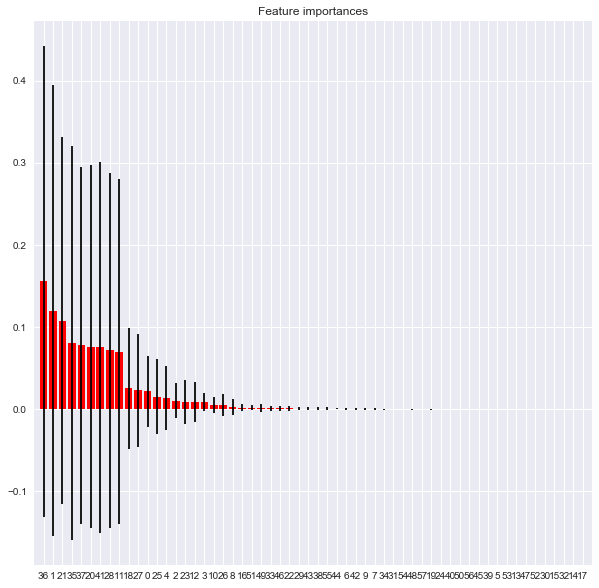

In [126]:
# feature importaance plot 

fig = plt.figure(figsize = (10, 10))

plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

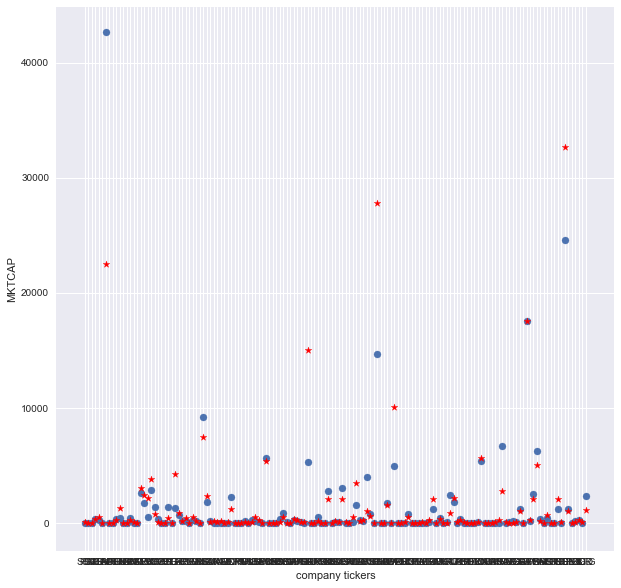

In [127]:
# testing size: 145

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(1, 1, 1)

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

y1 = regr.predict(x_test)
plt.xticks(x, my_xticks)

ax.scatter(x, y1, color = 'red', marker = '*')  # red dots are predicted MKTCAP from testing data 
plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

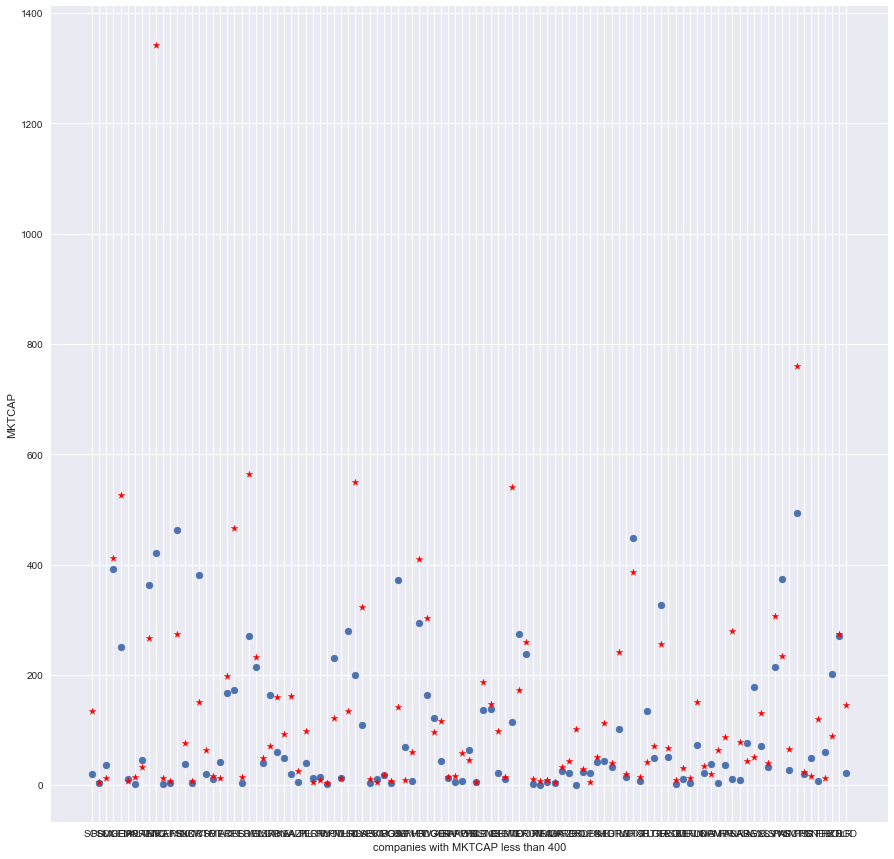

In [144]:
# zoom in plots
# data siz: 107

data_zoom = data2.loc[list(y_test[y_test < 500].index)]

fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_zoom = data_zoom.shape[0]
x = np.arange(num_zoom)
y = data_zoom['MKTCAP'].values
my_xticks = list(data_zoom['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y1 = regr.predict(data_zoom[featurelist])
plt.xticks(x, my_xticks)

ax.scatter(x, y1, color = 'red', marker = '*')  # red dots are predicted MKTCAP from testing data 
plt.ylabel('MKTCAP')
plt.xlabel('companies with MKTCAP less than 400')

plt.show()

In [129]:
# y_test.describe()

In [130]:
# pd.DataFrame(regr.predict(x_test)).describe()

In [131]:
# type(data2['security_code'].loc[x_test.index].values)

### 5-fold CV model evaluation  on initial model 

In [248]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

 Valid scoring options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


In [249]:
regr = RandomForestRegressor(random_state=0)
scores = cross_val_score(regr, data2[featurelist], data2['MKTCAP'], cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)

[ 0.67933291  0.98710095  0.65305852  0.59146335  0.83296741]
0.748784628954


### OOB score and RF parameters 

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably

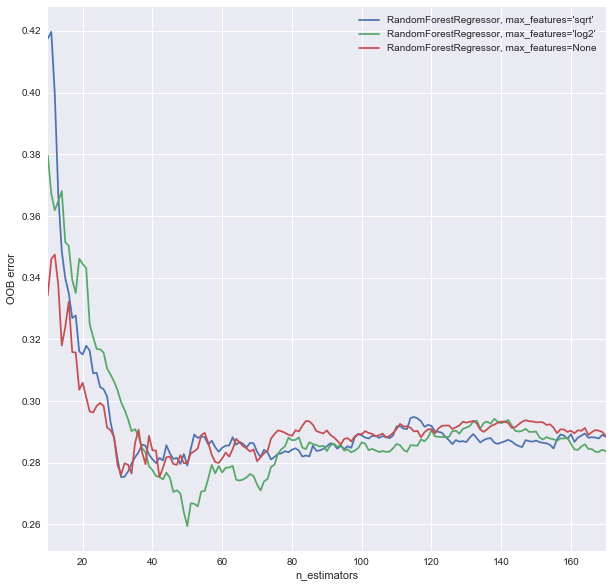

In [414]:
from collections import OrderedDict
# use (1 - OOB_score_) preliminary on the number of trees needed in the forest

x = data2[featurelist]
y = data2['MKTCAP']

# x = x_train
# y = y_train

ensemble_regs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(max_features = 'sqrt', random_state = 0, bootstrap=True, oob_score = True)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(max_features = 'log2', random_state = 0, bootstrap=True, oob_score = True)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(max_features = None, random_state = 0, bootstrap=True, oob_score = True))
]

# Map a regressor name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_regs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 170

# min_estimators = 200
# max_estimators = 600


for label, reg in ensemble_regs:
    for i in range(min_estimators, max_estimators + 1):
        reg.set_params(n_estimators=i)
        reg.fit(x, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - reg.oob_score_
        error_rate[label].append((i, oob_error))

fig = plt.figure(figsize = (10, 10))
        
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, reg_err in error_rate.items():
    xs, ys = zip(*reg_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error")
plt.legend(loc="upper right")

plt.show()

move on to parameter tuning using grid search and cross validation score 

### Parameter tuning

In [387]:
from sklearn.grid_search import GridSearchCV

# data 
x, y = data2[featurelist], data2['MKTCAP']
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state = 0)

In [388]:
x.shape[0]  # 725
x_train.shape[0]

580

In [425]:
model = RandomForestRegressor(random_state = 0, oob_score = True, bootstrap = True)
param_grid = { "n_estimators"      : [15, 10, 30],
           "max_features"      : ['log2'],
          "max_depth"         : [None],
#            "min_samples_split" : [5, 3, 4]
             }
grid_search = GridSearchCV(model, param_grid, scoring = 'r2', n_jobs = -1, cv = 5)
grid_search.fit(x_train, y_train)
print (grid_search.best_params_)

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 10}


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [426]:
# grid_search.grid_scores_

In [427]:
model_tuned = RandomForestRegressor(**grid_search.best_params_, random_state = 0, oob_score = True, bootstrap = True)
model_tuned.fit(x_train, y_train)

# model.set_params(grid_search.best_params_)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [428]:
k = regr.get_params().keys()

for i in k:
    print (regr.get_params()[i], model_tuned.get_params()[i])

True True
mse mse
None None
auto log2
None None
1e-07 1e-07
1 1
2 2
0.0 0.0
10 10
1 1
True True
0 0
0 0
False False


In [429]:
# model_tuned.oob_prediction_
# error estimation using OOB estimation on training data 
model_tuned.oob_score_

0.54880763138086452

In [430]:
# performance on testing data 

model_tuned.score(x_test, y_test)

0.6597424854289311

In [431]:
# modeleval using 5-fold CV

scores = cross_val_score(model_tuned, x, y, cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[ 0.73475242  0.99296855  0.89057812  0.57290524  0.57412078]
0.753065023718


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [432]:
# initial regression model with default values  
regr = RandomForestRegressor(random_state=0, bootstrap=True, oob_score = True)
regr.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

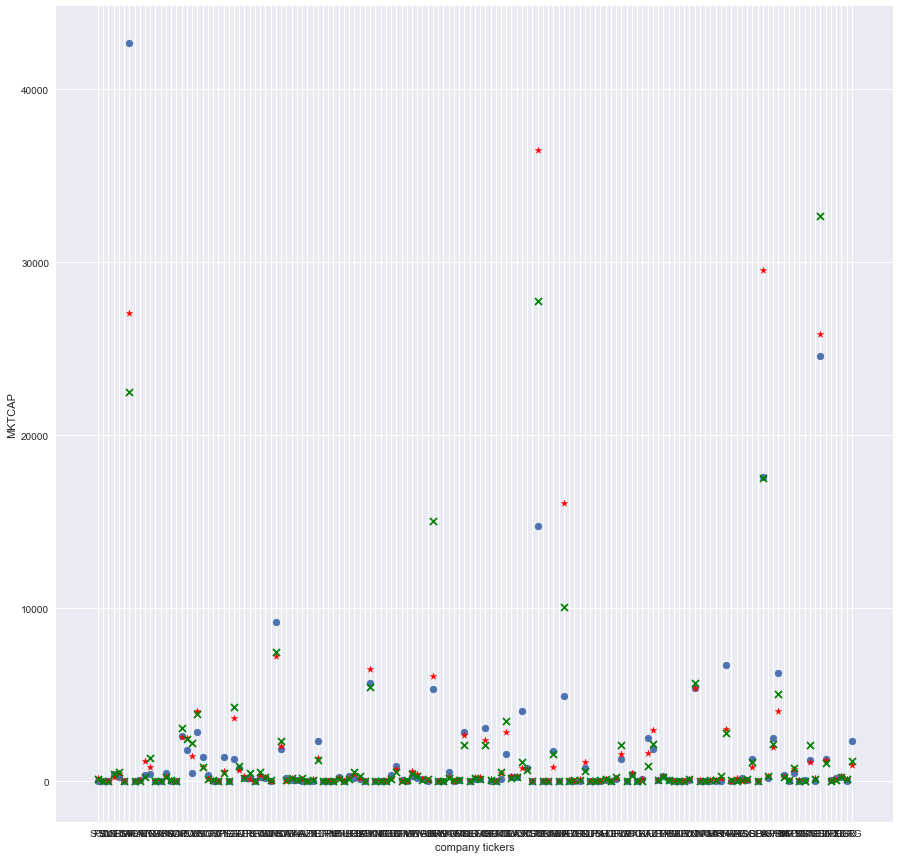

In [433]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

y2 = model_tuned.predict(x_test)
ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model


y1 = regr.predict(x_test)
ax.scatter(x, y1, color = 'green', marker = 'x')    # green xs are predicted MKTCAP from initial model with default parameters 

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

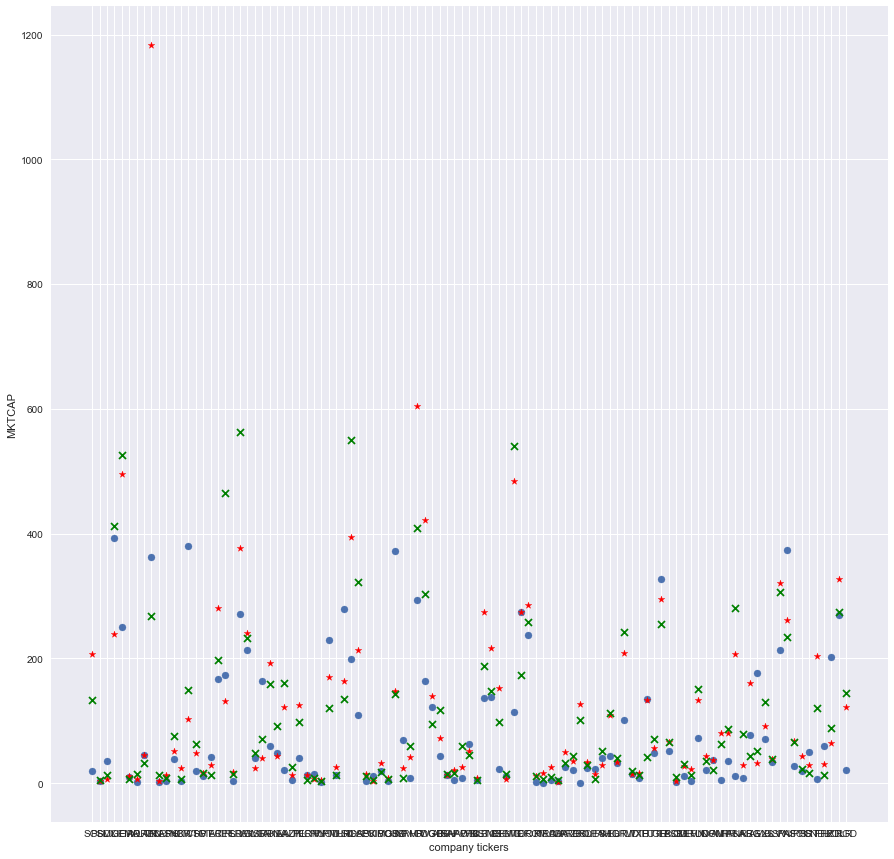

In [434]:
# zoom in plots
# data siz: 54

data_zoom = data2.loc[list(y_test[y_test < 400].index)]

fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = data_zoom.shape[0]
x = np.arange(num_predict)
y = data_zoom['MKTCAP'].values
my_xticks = list(data_zoom['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)


y2 = model_tuned.predict(data_zoom[featurelist])
ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model


y1 = regr.predict(data_zoom[featurelist])
ax.scatter(x, y1, color = 'green', marker = 'x')    # green xs are predicted MKTCAP from initial model with default parameters 


plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [435]:
# feature importance from tuned model  
# number of features put into the model is 58

importances = model_tuned.feature_importances_
# return indices of the most important featuer last, use [::-1] to reverse order
indices = np.argsort(importances)[::-1]

# standard devivation along columns/ trees
std = np.std([tree.feature_importances_ for tree in model_tuned.estimators_], axis=0)

In [436]:
print("Feature ranking(top down):")

for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print ('{}. feature {}, which is {}, has an importance of {}'.format(f + 1, indices[f], featurelist[indices[f]], importances[indices[f]]))


Feature ranking(top down):
1. feature 7, which is 総長期投資, has an importance of 0.09539795340699544
2. feature 3, which is 総資産, has an importance of 0.09195593242751317
3. feature 41, which is 投資資産, has an importance of 0.08395928064863879
4. feature 25, which is 剰余金, has an importance of 0.08205435553095686
5. feature 54, which is 営業資産, has an importance of 0.07703643627581722
6. feature 28, which is 負債合計, has an importance of 0.07367829157578583
7. feature 37, which is 非流動資産合計, has an importance of 0.07102485948719878
8. feature 21, which is 棚卸, has an importance of 0.0702888438198352
9. feature 12, which is 無形資産, has an importance of 0.06914907905344128
10. feature 20, which is 売掛金, has an importance of 0.06708491266078401
11. feature 11, which is 流動負債, has an importance of 0.022951383457773138
12. feature 31, which is 長期繰延税金負債, has an importance of 0.021720249788752474
13. feature 55, which is 営業負債, has an importance of 0.02074662885735465
14. feature 57, which is 使用資産, has an import

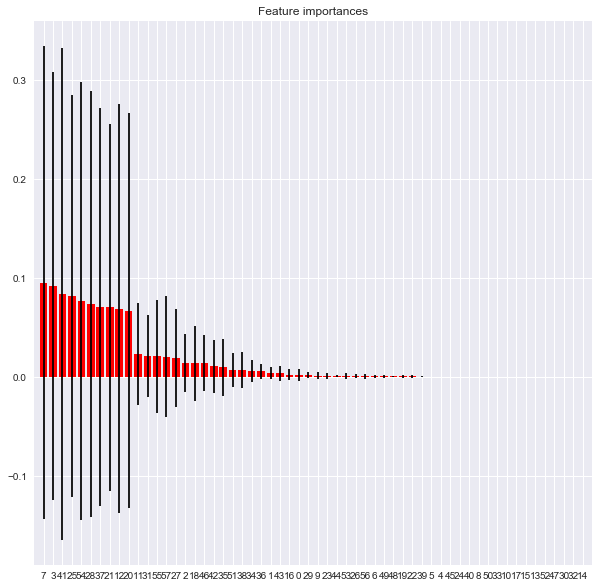

In [437]:
# feature importance plot 

fig = plt.figure(figsize = (10, 10))

plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Tuned model on MKTCAP in 2015 and features in 2014

In [402]:
# df.groupby('ddate').count()

In [438]:
# prepare 2015 MKTCAP as y

df2015 = df2[df2['ddate'] == 2015][['security_code', 'MKTCAP']]
df2015.head()
# df2015.describe()
# len(df2015['security_code'])

,security_code,MKTCAP
13759,AAL,4648.695652
13762,AAZ,12.111100
13763,ABC,1194.563299
13764,ABDP,54.516700
13765,ABF,27194.008600


In [439]:
# prepare all data in 2014 as features for x

collist = list(df2.columns[1:61])
df2014 = df2[df2['ddate'] == 2014][collist]

# removing '時価総額', which is Market Capitalization
# MKTCAP is the adjusted market capitaliztion with the amount of self owned stocks removed 
del df2014['時価総額']
df2014.head()
# df2014.describe()
# len(df2014['security_code'])

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
12421,AAL,27073.0000,138.0000,-2513.0000,66010.000,6748.0000,0.000,14308.000,1266.0,38475.000,...,32177.0000,-3630.0000,0.139179,0.005097,0.0,-10521.0000,7560.0000,-5109.0000,38475.000,40926.000
12424,AAZ,67.9640,-8.9090,-10.9280,176.478,0.3220,0.000,39.027,0.0,114.431,...,85.9160,-8.3730,-0.007887,-0.131084,0.0,-52.4360,38.7050,-12.2160,114.431,140.920
12425,ABC,127.9540,41.6540,34.0450,206.594,55.2780,0.584,90.929,0.0,8.502,...,180.9000,-48.7310,0.706387,0.325539,0.0,55.8620,35.0670,-16.8320,8.502,26.737
12426,ABDP,13.8466,2.6513,2.1519,13.589,4.8962,0.000,12.369,0.0,1.220,...,10.3259,-1.3787,0.291046,0.191477,0.0,4.8962,7.4728,-3.1838,1.220,5.509
12427,ABF,12943.0000,1077.0000,762.0000,10472.000,519.0000,0.000,3626.000,0.0,4665.000,...,6753.0000,-2073.0000,0.243375,0.083211,0.0,-446.0000,3107.0000,-2326.0000,4665.000,5446.000


In [440]:
# only keeping companies that exist in both 2013 and 2014 
# removing entries with zero MKTCAP

data = pd.merge(df2014, df2015, how='inner', on=['security_code']).dropna()
data3 = data[data['MKTCAP'] != 0]

data3.head()
# data.describe()
# len(data3['security_code'])   # 322

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
0,AAL,27073.0000,138.0000,-2513.0000,66010.000,6748.0000,0.000,14308.000,1266.0,38475.000,...,-3630.0000,0.139179,0.005097,0.0,-10521.0000,7560.0000,-5109.0000,38475.000,40926.000,4648.695652
1,AAZ,67.9640,-8.9090,-10.9280,176.478,0.3220,0.000,39.027,0.0,114.431,...,-8.3730,-0.007887,-0.131084,0.0,-52.4360,38.7050,-12.2160,114.431,140.920,12.111100
2,ABC,127.9540,41.6540,34.0450,206.594,55.2780,0.584,90.929,0.0,8.502,...,-48.7310,0.706387,0.325539,0.0,55.8620,35.0670,-16.8320,8.502,26.737,1194.563299
3,ABDP,13.8466,2.6513,2.1519,13.589,4.8962,0.000,12.369,0.0,1.220,...,-1.3787,0.291046,0.191477,0.0,4.8962,7.4728,-3.1838,1.220,5.509,54.516700
4,ABF,12943.0000,1077.0000,762.0000,10472.000,519.0000,0.000,3626.000,0.0,4665.000,...,-2073.0000,0.243375,0.083211,0.0,-446.0000,3107.0000,-2326.0000,4665.000,5446.000,27194.008600


In [441]:
featurelist = data3.columns[1:59]
x = data3[featurelist]
y = data3['MKTCAP']

print (model_tuned.oob_score_)
model_tuned.score(x, y)

0.548807631381


0.60226417659341669

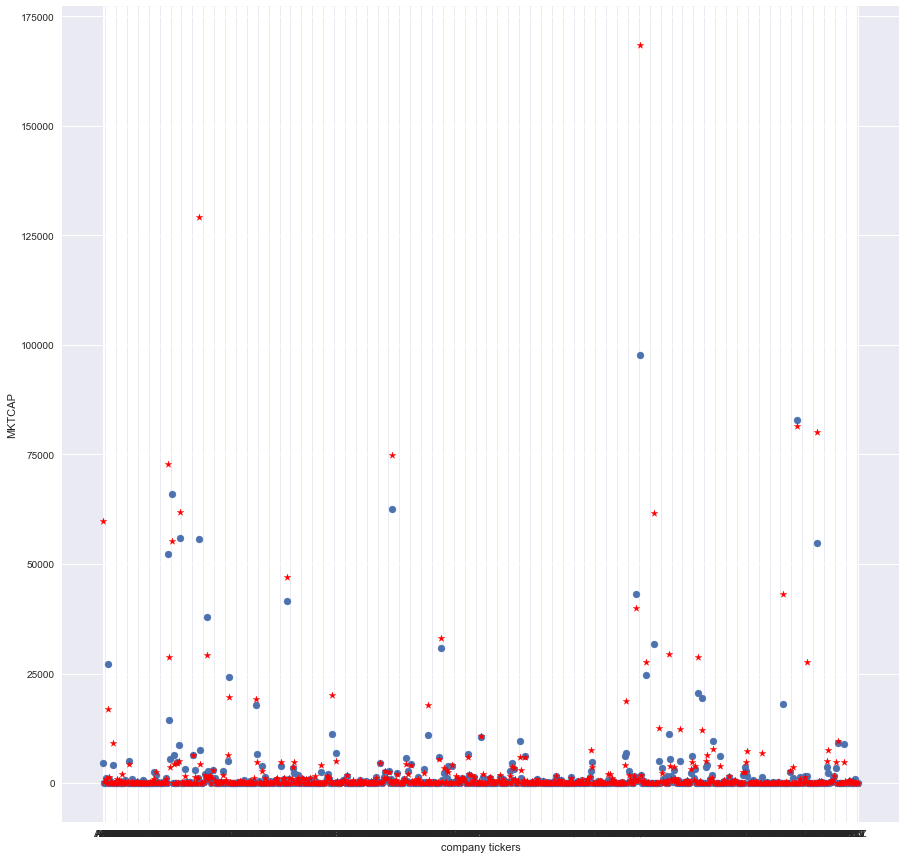

In [442]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = len(x)
x = np.arange(num_predict)
y = data3['MKTCAP'].values
my_xticks = list(data3['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)


y2 = model_tuned.predict(data3[featurelist])
plt.xticks(x, my_xticks)

ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [451]:
data3['MKTCAP'].describe()

count      686.000000
mean      1998.108418
std       8262.753003
min          0.368600
25%         14.360000
50%         85.469900
75%        634.626900
max      97767.194515
Name: MKTCAP, dtype: float64

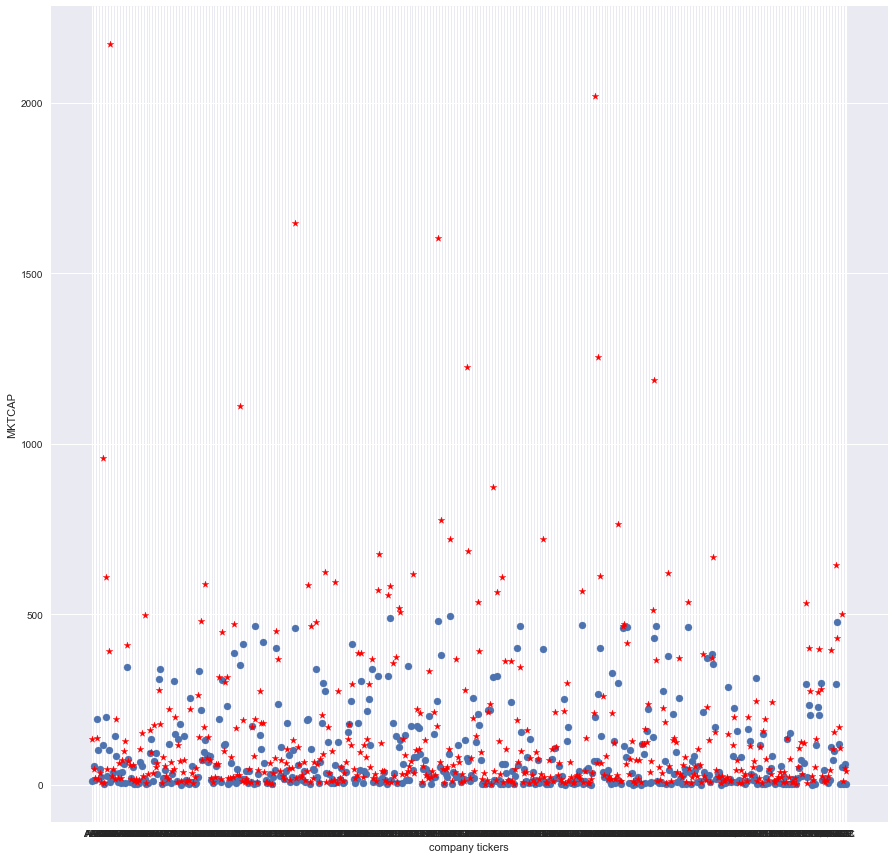

In [453]:
# zoom in plot 
# data size: 261, originally, the size is 322

data_zoom = data3[data3['MKTCAP'] < 500]


fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = data_zoom.shape[0]
x = np.arange(num_predict)
y = data_zoom['MKTCAP'].values
my_xticks = list(data3['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)


y2 = model_tuned.predict(data_zoom[featurelist])
ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

### Look at MSE

In [443]:
# MSE on RF regressor prediction 
model_tuned.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)>

In [444]:
x = data2[featurelist]
y = data2['MKTCAP']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [445]:
import math 
predicts = model_tuned.predict(x_test)

# MSE on testing data and compare this with the MSE from training data to see if  the model overfits the data 

sse = []
for i in range(len(predicts)):
    sse.append(math.log10((y_test.iloc[i] - predicts[i]) **2))
    
MSE = sum(sse)/len(predicts)
print ('MSE from testing data is {}'. format(MSE))

MSE from testing data is 3.4984647154033106


In [446]:
# MSE on training data 

train_pred = model_tuned.predict(x_train)

sse2 = []
for i in range(len(predicts)):
    sse2.append(math.log10((y_train.iloc[i] - train_pred[i]) **2))
    
MSE2 = sum(sse2)/len(train_pred)
print ('MSE from training data is {}'. format(MSE2))

ValueError: math domain error

In [447]:
pd.DataFrame(sse).describe()

,0
count,145.000000
mean,3.498465
std,2.040365
min,-2.988886
25%,2.254685
50%,3.552861
75%,4.744498
max,8.676148


In [ ]:
boston = load_boston()
X = boston["data"]
Y = boston["target"]
size = len(boston["data"])
# We’ll use 400 samples for training, leaving 106 samples for test. The size of the forest should be relatively large, so let’s use 1000 trees.

trainsize = 400
idx = range(size)
#shuffle the data
np.random.shuffle(idx)
rf = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1)
rf.fit(X[idx[:trainsize]], Y[idx[:trainsize]])
# We can now define a function to calculate prediction intervals for every prediction:


def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(X[x])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up
# Let’s compute 90% prediction intervals and test how many observations in the test set fall into the interval.

err_down, err_up = pred_ints(rf, X[idx[trainsize:]], percentile=90)
 
truth = Y[idx[trainsize:]]
correct = 0.
for i, val in enumerate(truth):
    if err_down[i] <= val <= err_up[i]:
        correct += 1
print correct/len(truth)


In [472]:
correct/len(truth)

0.8

In [471]:
x, y = data2[featurelist], data2['MKTCAP']

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)


size = data2.shape[0]

trainsize = x_train.shape[0]
idx = list(range(size))
#shuffle the data
np.random.shuffle(idx)

# function to calculate prediction intervals for every prediction:

def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(X.iloc[x]))
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up


# compute 90% prediction intervals and test how many observations in the test set fall into the interval.
err_down, err_up = pred_ints(model_tuned, x_test, percentile=90)
 
truth = y_test
correct = 0.
for i, val in enumerate(truth):
    if err_down[i] <= val <= err_up[i]:
        correct += 1
print (correct/len(truth))


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

0.8


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

### save the model for further use using pickle 



In [116]:
import pickle 

In [144]:
# save the model to disk
filename = 'LN_model.sav'
pickle.dump(model_tuned, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)